In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('imdb_movie_dataset.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


## Overview of dataset

In [15]:
print('Shape of dataset:',df.shape,end='\n\n')
print('Columns of dataset:\n',df.columns,end='\n\n')
print('properties of dataset:\n',df.info(),end='\n\n')
print('Properties of attributes:\n',df.describe())

Shape of dataset: (1000, 12)

Columns of dataset:
 Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore 

## Cleaning of dataset

In [19]:
print('Missing value in each column:\n',df.isnull().sum())
print('\n\nTotal missing value:',df.isnull().sum().sum())

Missing value in each column:
 Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64


Total missing value: 192


In [21]:
# checking missing value containing row
df[df.isnull().any(axis=1)]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
22,23,Hounds of Love,"Crime,Drama,Horror",A cold-blooded predatory couple while cruising...,Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,6.7,1115,NaN,72.0
25,26,Paris pieds nus,Comedy,Fiona visits Paris for the first time to assis...,Dominique Abel,"Fiona Gordon, Dominique Abel,Emmanuelle Riva, ...",2016,83,6.8,222,NaN,NaN
26,27,Bahubali: The Beginning,"Action,Adventure,Drama","In ancient India, an adventurous and daring ma...",S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty,Tamann...",2015,159,8.3,76193,6.50,NaN
27,28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,Martyrs,Horror,A young woman's quest for revenge against the ...,Pascal Laugier,"Morjana Alaoui, Mylène Jampanoï, Catherine Bég...",2008,99,7.1,63785,NaN,89.0
989,990,Selma,"Biography,Drama,History",A chronicle of Martin Luther King's campaign t...,Ava DuVernay,"David Oyelowo, Carmen Ejogo, Tim Roth, Lorrain...",2014,128,7.5,67637,52.07,NaN
992,993,Take Me Home Tonight,"Comedy,Drama,Romance","Four years after graduation, an awkward high s...",Michael Dowse,"Topher Grace, Anna Faris, Dan Fogler, Teresa P...",2011,97,6.3,45419,6.92,NaN
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0


In [151]:
# heari 100 rows+ containes the null values, so we cannot drop it. Hear we are filling this null values which can be fill with mean values.
df['Revenue (Millions)'] = df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].mean())
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].mean())

print('Now missing value in each column:\n',df.isnull().sum())
df

Now missing value in each column:
 Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,82.956376,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,82.956376,22.0


In [152]:
# now check duplicate values
dupli = df.duplicated().sum()
print('Total duplicat values:',dupli)
if(dupli > 0):
    df = df.drop_duplicate()
    print('Dropped duplicate')
else:
    print('No duplicates')    

Total duplicat values: 0
No duplicates


## EDA

In [134]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,96.412043,16.634858
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,58.985043
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [135]:
# listing unique year
print("Year which are listed in the data set:\n",df['Year'].unique())

Year which are listed in the data set:
 [2014 2012 2016 2015 2007 2011 2008 2006 2009 2010 2013]


In [136]:
# average votes on the movies
avg_vote = df['Votes'].mean()
print('Average votes: ',avg_vote)
print('Number of movies has greater votes than avg votes:',(df['Votes'] > avg_vote).sum())

Average votes:  169808.255
Number of movies has greater votes than avg votes: 367


### Votes Distribution

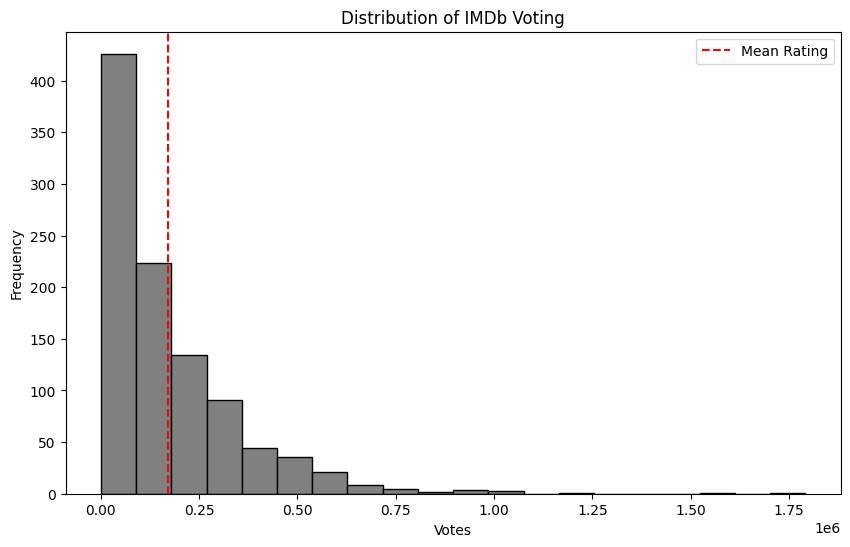

In [153]:
plt.figure(figsize=(10, 6))
plt.hist(df['Votes'], bins=20, color='grey',edgecolor='black')
plt.title('Distribution of IMDb Voting')
plt.xlabel('Votes')
plt.ylabel('Frequency')
plt.axvline(df['Votes'].mean(), color='red', linestyle='--', label='Mean Rating')
plt.legend()
plt.show()

### Rating distribution

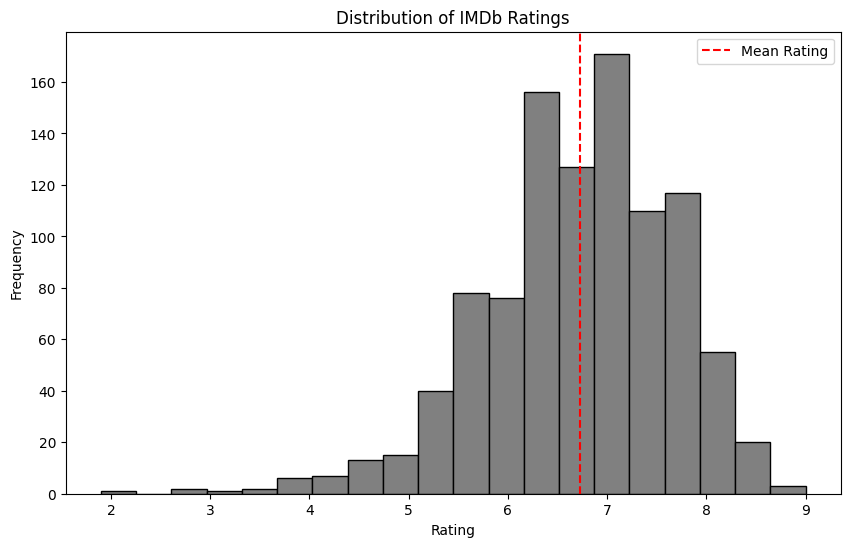

In [154]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=20, color='grey',edgecolor='black')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(df['Rating'].mean(), color='red', linestyle='--', label='Mean Rating')
plt.legend()
plt.show()

### top voted movies

                     Title    Votes  Rating
54         The Dark Knight  1791916     9.0
80               Inception  1583625     8.8
124  The Dark Knight Rises  1222645     8.5
36            Interstellar  1047747     8.6
76            The Avengers  1045588     8.1
144       Django Unchained  1039115     8.4
77    Inglourious Basterds   959065     8.3
99            The Departed   937414     8.5
87                  Avatar   935408     7.8
64            The Prestige   913152     8.5


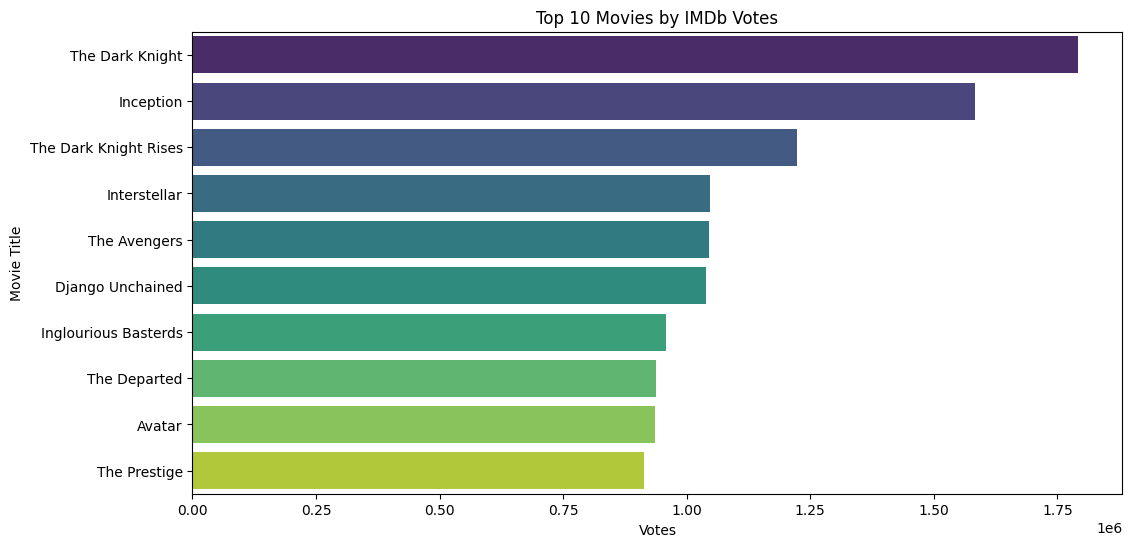

In [155]:
top10_voted = df.loc[:,['Title','Votes','Rating']].sort_values(by='Votes',ascending=False)[0:10]
print(top10_voted)

plt.figure(figsize=(12, 6))
sns.barplot(x='Votes', y='Title', data=top10_voted, palette='viridis')
plt.title('Top 10 Movies by IMDb Votes')
plt.xlabel('Votes')
plt.ylabel('Movie Title')
plt.show()

### top rated movies

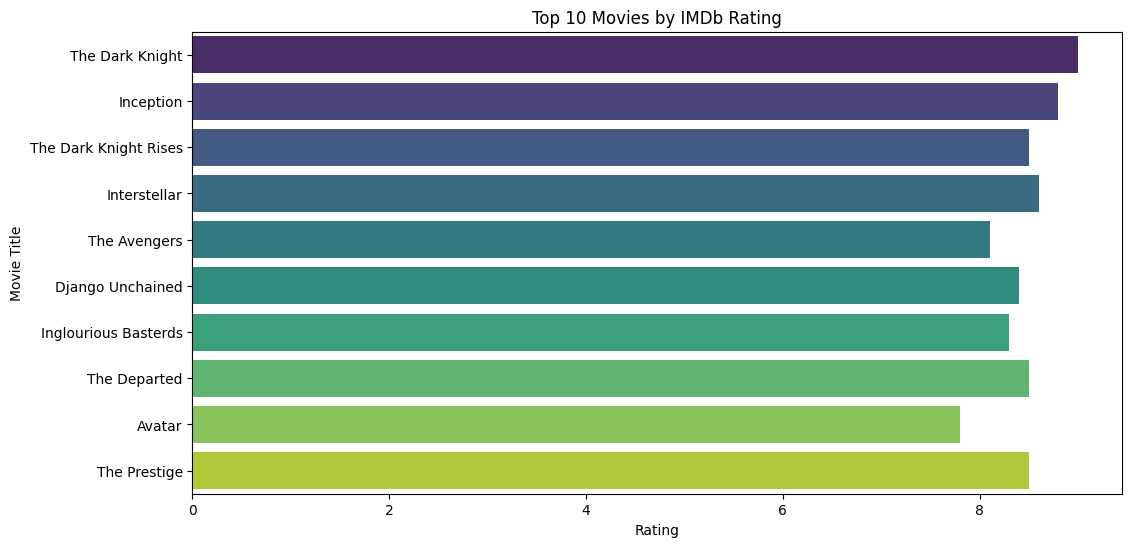

In [156]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='Title', data=top10_voted, palette='viridis')
plt.title('Top 10 Movies by IMDb Rating')
plt.xlabel('Rating')
plt.ylabel('Movie Title')
plt.show()

### Rating Vs Revenue Overview

Mean Revenue: 82.95637614678898
Mean Rating: 6.723199999999999


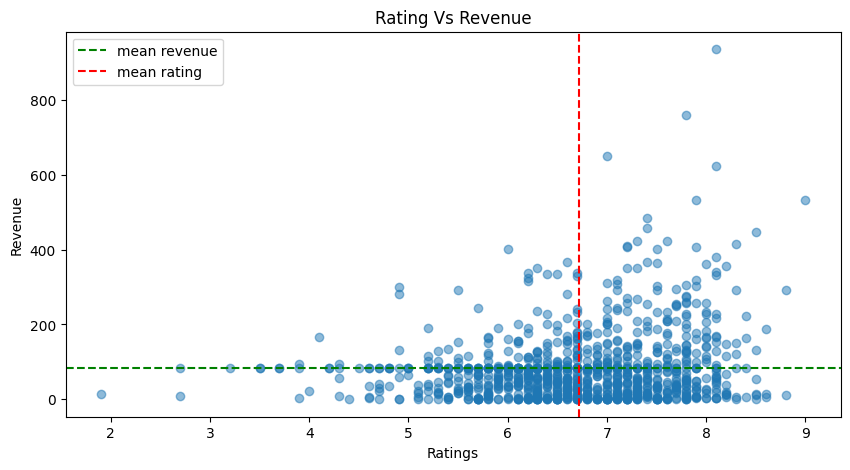

In [157]:
print('Mean Revenue:',df['Revenue (Millions)'].mean())
print('Mean Rating:',df['Rating'].mean())
plt.figure(figsize=(10,5))

plt.scatter(df['Rating'],df['Revenue (Millions)'],alpha=0.5)
plt.title('Rating Vs Revenue')
plt.xlabel('Ratings')
plt.ylabel('Revenue')
plt.axhline(df['Revenue (Millions)'].mean(), color='green', linestyle='--', label='mean revenue')
plt.axvline(df['Rating'].mean(), color='red',linestyle='--',label='mean rating')
plt.legend()
plt.show()

### Extracting main genre

In [158]:
# unique genre
print(df['Genre'].unique())

['Action,Adventure,Sci-Fi' 'Adventure,Mystery,Sci-Fi' 'Horror,Thriller'
 'Animation,Comedy,Family' 'Action,Adventure,Fantasy' 'Comedy,Drama,Music'
 'Comedy' 'Action,Adventure,Biography' 'Adventure,Drama,Romance'
 'Adventure,Family,Fantasy' 'Biography,Drama,History'
 'Animation,Adventure,Comedy' 'Action,Comedy,Drama' 'Action,Thriller'
 'Biography,Drama' 'Drama,Mystery,Sci-Fi' 'Adventure,Drama,Thriller'
 'Drama' 'Crime,Drama,Horror' 'Action,Adventure,Drama' 'Drama,Thriller'
 'Action,Adventure,Comedy' 'Action,Horror,Sci-Fi' 'Adventure,Drama,Sci-Fi'
 'Action,Adventure,Western' 'Comedy,Drama' 'Horror'
 'Adventure,Drama,Fantasy' 'Action,Crime,Thriller' 'Action,Crime,Drama'
 'Adventure,Drama,History' 'Crime,Horror,Thriller' 'Drama,Romance'
 'Comedy,Drama,Romance' 'Horror,Mystery,Thriller' 'Crime,Drama,Mystery'
 'Drama,Romance,Thriller' 'Drama,History,Thriller' 'Action,Drama,Thriller'
 'Drama,History' 'Action,Drama,Romance' 'Drama,Fantasy' 'Action,Sci-Fi'
 'Adventure,Drama,War' 'Action,Comedy,

In [174]:
genre = df['Genre']

for i in range(1000):
    g = genre.loc[i].split(',')
    df.loc[i,['Main Genre']] = g[0]
# here we have split all the genre of each movie into different column.
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Main Genre
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.130000,76.0,Action
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.460000,65.0,Adventure
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.120000,62.0,Horror
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.320000,59.0,Animation
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.020000,40.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,82.956376,45.0,Crime
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.540000,46.0,Horror
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.010000,50.0,Drama
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,82.956376,22.0,Adventure


In [178]:
print(df['Main Genre'].nunique())
df['Main Genre'].unique()

13


array(['Action', 'Adventure', 'Horror', 'Animation', 'Comedy',
       'Biography', 'Drama', 'Crime', 'Romance', 'Mystery', 'Thriller',
       'Sci-Fi', 'Fantasy'], dtype=object)

### Top rated genre

In [182]:
top_genre = df.groupby('Main Genre')['Rating'].mean().sort_values(ascending=False)
print(top_genre)

Main Genre
Animation    7.324490
Biography    7.318750
Drama        6.954872
Adventure    6.908000
Mystery      6.876923
Crime        6.807042
Romance      6.600000
Action       6.592491
Comedy       6.493143
Thriller     5.960000
Horror       5.867391
Fantasy      5.850000
Sci-Fi       4.966667
Name: Rating, dtype: float64


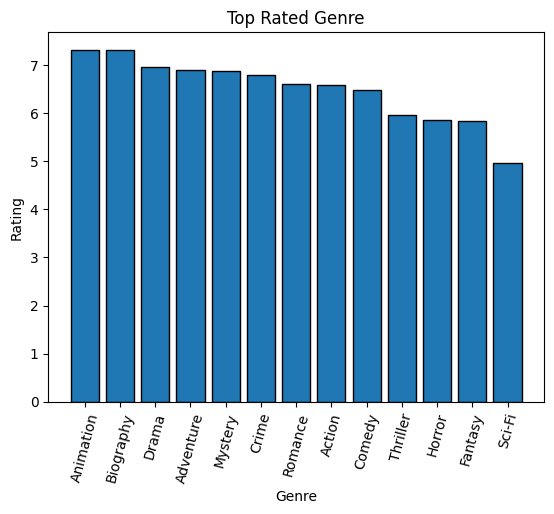

In [184]:
plt.bar(top_genre.index, top_genre.values, edgecolor='black')
plt.title('Top Rated Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=75)
plt.show()

### Average revenue in each genre

In [186]:
revenue_genre = df.groupby('Main Genre')['Revenue (Millions)'].mean().sort_values(ascending=False)
print(revenue_genre)

Main Genre
Animation    186.804342
Action       119.822793
Adventure    111.827007
Thriller      74.692739
Fantasy       73.033188
Romance       72.703188
Mystery       67.237135
Biography     57.642117
Sci-Fi        56.075459
Comedy        54.988578
Crime         51.078991
Horror        50.231742
Drama         45.290865
Name: Revenue (Millions), dtype: float64


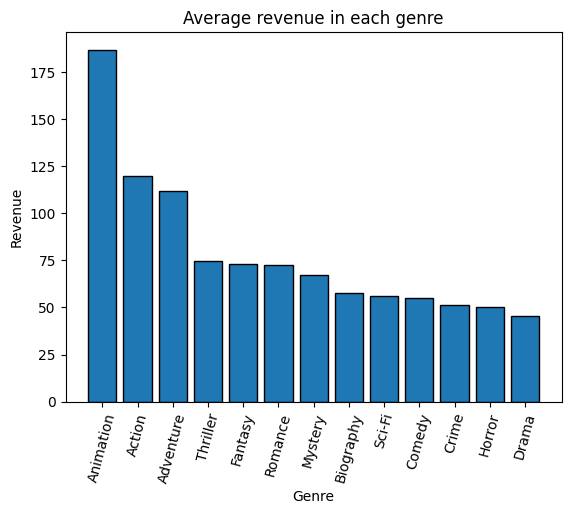

In [187]:
plt.bar(revenue_genre.index, revenue_genre.values, edgecolor='black')
plt.title('Average revenue in each genre')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=75)
plt.show()